## Background
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

<img src = 'Data_Dictionary.PNG' height = '800' width = '800'>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style(style = 'whitegrid')

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [2]:
# Importing the Dataset
country_data_df = pd.read_csv('Country-data.csv')
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Decision Taken**: As we can see from the above exports, health and imports are in terms of % of total GDP. But I am not multiplying it with 100 or multiplying it with gdpp because my data will just be scaled. So i took a decision to keep the data as it is

In [3]:
# To check the Shape of the Dataframe
country_data_df.shape

(167, 10)

In [4]:
# To check Some information regarding the distrubution and data type
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


**Inferrence**: Out of 10 Columns, only one column is catagorical and rest all are numeric and as we can see out of 167 entries none of the features have Null Values

In [5]:
# Checking of Not Null
country_data_df.isnull().sum()
# As we can see below there are no null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Checking of Not Null row wise
country_data_df.isnull().sum(axis = 1).sum()
# As we can see below there are no null values

0

In [7]:
#Checking for Duplicates
country_data_df.duplicated().sum() == 0
# As you can see there is a row for which there exists some duplicates

True

In [8]:
# Checking some Statistical description of data
country_data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Conclusion Driven**: As we can see below there are some features for which the Data Spread is huge. So we need to do the outlier analysis as well as the data scalling

### Exploratory Data Analysis

In [9]:
#Let the distribution of the Country Data
country_data_df['country'].nunique()
# As we can see all the data are uniques so in total there are about 167 Country

167

In [10]:
# To see what are all the columns
country_data_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

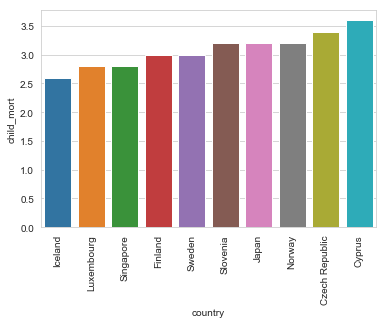

In [11]:
# Now let's see the distribution for each Feature
# We will visualize the data distribution wrt to each features and country
# We will try to see the distribution for below 10 as we need anylysis report for the countries that needs most of attention 

# Lets first pick up child_mort
df_to_show = country_data_df[['country','child_mort']].sort_values(by = 'child_mort').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['child_mort'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven** : These are the countries which are the bottom 10 which has the worst child mortality

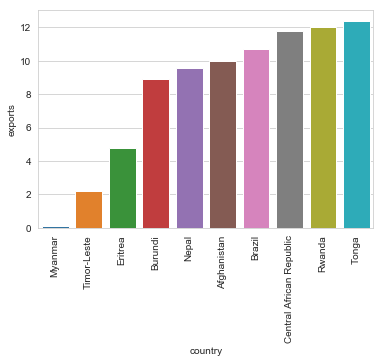

In [12]:
# Lets first pick up exports and the countries which has least values
df_to_show = country_data_df[['country','exports']].sort_values(by = 'exports').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['exports'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: As we can see **Mayanmar, Timor-Lesta, Eritrea and Burundi and Nepal** they have Exports less than 10%

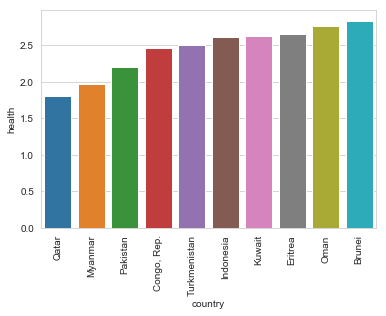

In [13]:
# Lets first pick up exports and the countries which has least values
df_to_show = country_data_df[['country','health']].sort_values(by = 'health').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['health'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: As we can see above for spending towards Health, **Qatar** is having the least spending, followed by **Myanmar, Pakistan** and so on

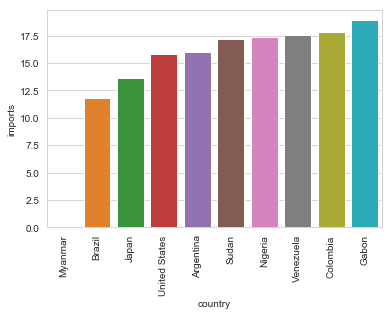

In [14]:
# Lets first pick up imports and the countries which has least values
df_to_show = country_data_df[['country','imports']].sort_values(by = 'imports').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['imports'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: For import of Goods and services, we can see that **Myanmar** is very vary less followed by Brazil, Japan.

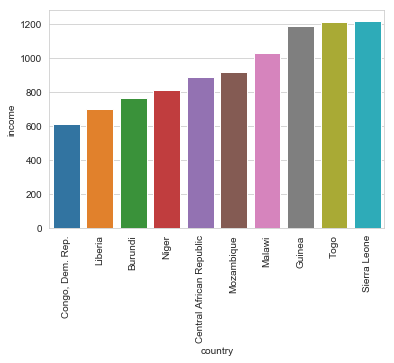

In [15]:
# Lets first pick up income and the countries which has least values
df_to_show = country_data_df[['country','income']].sort_values(by = 'income').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['income'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: Net Income per person for this field we can see For the Below 6 countries the net income is less than 900 and for the rest of 4 the net income is between 1000 and 1200

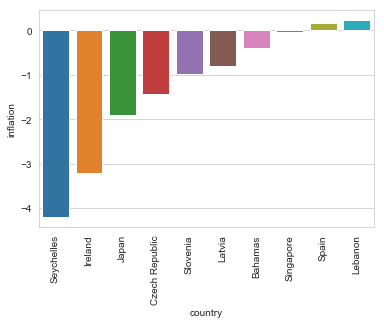

In [16]:
# Lets first pick up inflation and the countries which has least values
df_to_show = country_data_df[['country','inflation']].sort_values(by = 'inflation').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['inflation'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: For the **Seychelles, Ireland, Japan, Czech Republic, Solvenia,Latvia, Bahamas, Singapore** , the annual growth rate of total GDP is in negative. And **Spain and Lebanion** it's nearly zero but its just positive.

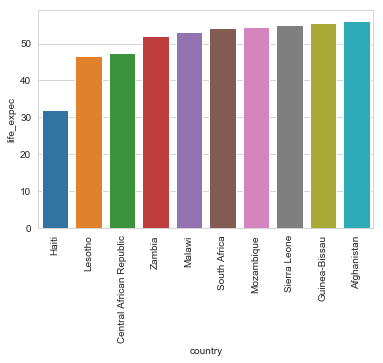

In [17]:
# Lets first pick up life_expec and the countries which has least values
df_to_show = country_data_df[['country','life_expec']].sort_values(by = 'life_expec').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['life_expec'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: For the below 10 countries the average nunmber of years the new born is expected tolive is for below three countries, i.e. **Haiti, Lesotho, Central African Republic** the life expectency is less than 50, but for the rest of the 10 countries the life_expectency is greater than 50

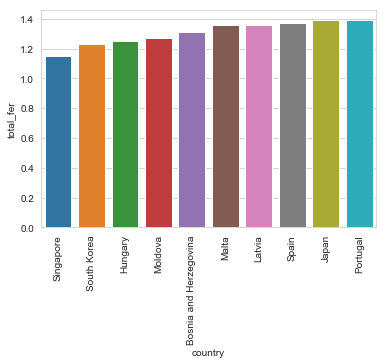

In [18]:
# Lets first pick up total_fer and the countries which has least values
df_to_show = country_data_df[['country','total_fer']].sort_values(by = 'total_fer').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['total_fer'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: Totatl Fertily for the below 10 countries are between ~1.2 to ~1.4, the country having the least value is singapore

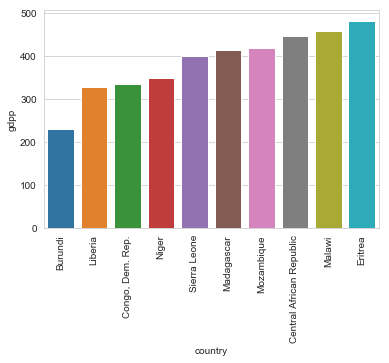

In [19]:
# Lets first pick up gdpp and the countries which has least values
df_to_show = country_data_df[['country','gdpp']].sort_values(by = 'gdpp').head(10)
sns.barplot(x = df_to_show['country'], y = df_to_show['gdpp'])
plt.xticks(rotation = 90)
plt.show()

**Conclusion Driven**: The GDP Per capita is least for Burundi followed by Liberia, Congo Dem Rep and Nigeria and rest all have between 400 to 500

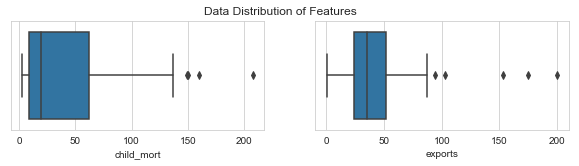

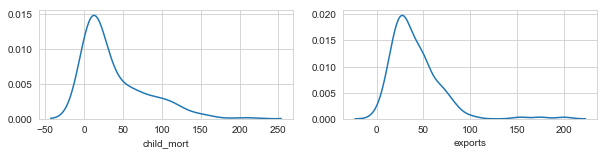

Skewness for child_mort is 1.45
Skewness for exports is 2.45


In [20]:
## We will try to visualize the distrubution for each column
plt.figure(1, figsize=(10,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,2,1)
sns.boxplot(country_data_df['child_mort'])
plt.subplot(1,2,2)
sns.boxplot(country_data_df['exports'])
plt.show()

plt.figure(2, figsize=(10,2))
plt.subplot(1,2,1)
sns.distplot(country_data_df['child_mort'], hist = False)
plt.subplot(1,2,2)
sns.distplot(country_data_df['exports'], hist = False)
plt.show()
print("Skewness for child_mort is {0}".format(round(country_data_df['child_mort'].skew(),2)))
print("Skewness for exports is {0}".format(round(country_data_df['exports'].skew(),2)))

**Conclusion Driven**: 
1. For **child_mort** the data points are mainly distributed between 0 - ~140 and there are some data points which are more than 150
2. For **exports** the data points are between 0-~80 and there are some outliers where it exists greater than 80 and it spreads till 200

As we can see both the graphs are positively Skewed

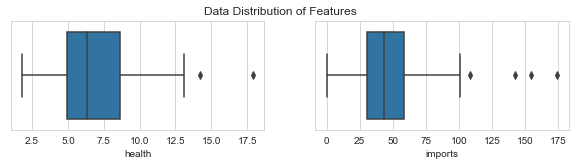

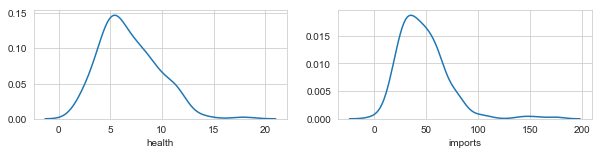

Skewness for health is 0.71
Skewness for imports is 1.91


In [21]:
## We will try to visualize the distrubution for each column
plt.figure(1, figsize=(10,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,2,1)
sns.boxplot(country_data_df['health'])
plt.subplot(1,2,2)
sns.boxplot(country_data_df['imports'])
plt.show()

plt.figure(2, figsize=(10,2))
plt.subplot(1,2,1)
sns.distplot(country_data_df['health'], hist = False)
plt.subplot(1,2,2)
sns.distplot(country_data_df['imports'], hist = False)
plt.show()
print("Skewness for health is {0}".format(round(country_data_df['health'].skew(),2)))
print("Skewness for imports is {0}".format(round(country_data_df['imports'].skew(),2)))

**Conclusion Driven**:
1. For **health**, most of the data points lies between ~2 to ~13 and some of the points lies > ~13
2. For **imports**, most of the data points lies between 0-100, there are data points which lies >100

Both the graphs are positively skewed, and the Health have very less Positively skewed and imports has around 1.91

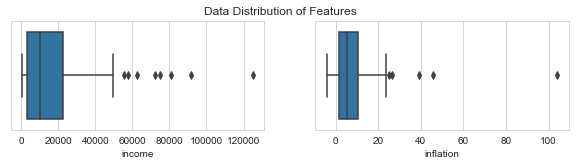

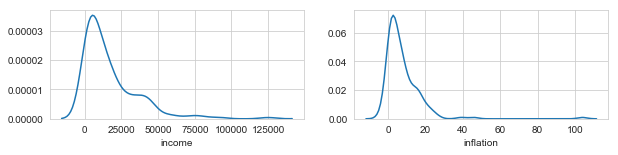

Skewness for income is 2.23
Skewness for inflation is 5.15


In [22]:
## We will try to visualize the distrubution for each column
plt.figure(1, figsize=(10,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,2,1)
sns.boxplot(country_data_df['income'])
plt.subplot(1,2,2)
sns.boxplot(country_data_df['inflation'])
plt.show()

plt.figure(2, figsize=(10,2))
plt.subplot(1,2,1)
sns.distplot(country_data_df['income'], hist = False)
plt.subplot(1,2,2)
sns.distplot(country_data_df['inflation'], hist = False)
plt.show()
print("Skewness for income is {0}".format(round(country_data_df['income'].skew(),2)))
print("Skewness for inflation is {0}".format(round(country_data_df['inflation'].skew(),2)))

**Conclusion Driven**:
1. For **income** and **inflation**, there are lots of points which is lays beyond the upper whisker, like for income > 50000, there are many points as well as for inflation as well there are some amount of points when the value is > 25

Both of the graph have quite a high positively skewness

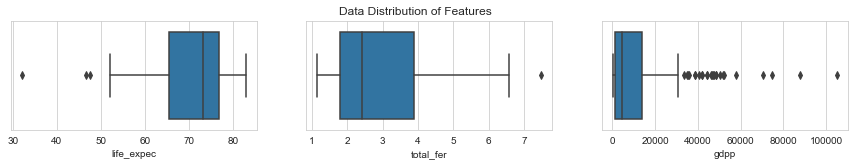

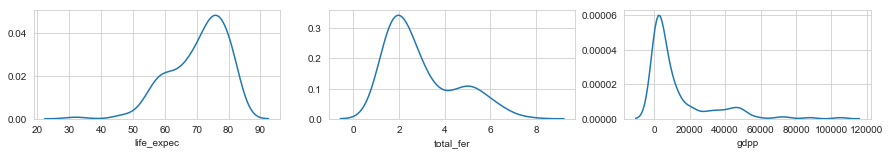

Skewness for life_expec is -0.97
Skewness for total_fer is 0.97
Skewness for gdpp is 2.22


In [23]:
## We will try to visualize the distrubution for each column
plt.figure(1, figsize=(15,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,3,1)
sns.boxplot(country_data_df['life_expec'])
plt.subplot(1,3,2)
sns.boxplot(country_data_df['total_fer'])
plt.subplot(1,3,3)
sns.boxplot(country_data_df['gdpp'])
plt.show()

plt.figure(2, figsize=(15,2))
plt.subplot(1,3,1)
sns.distplot(country_data_df['life_expec'], hist = False)
plt.subplot(1,3,2)
sns.distplot(country_data_df['total_fer'], hist = False)
plt.subplot(1,3,3)
sns.distplot(country_data_df['gdpp'], hist = False)
plt.show()

print("Skewness for life_expec is {0}".format(round(country_data_df['life_expec'].skew(),2)))
print("Skewness for total_fer is {0}".format(round(country_data_df['total_fer'].skew(),2)))
print("Skewness for gdpp is {0}".format(round(country_data_df['gdpp'].skew(),2)))

**Conclusion Driven**:
1. For ***life_expec*** and ***gdpp***, there are points which lies beyond the whiskers, so there exists some outliers
2. But for **total_fer** most of the data points lies between 1-6.8 and very less data points lies beyond the whiskers

As we can see above for life_expec has negative skewness and rest all have positive but gdpp have quite high Skewness because of the spread and outliers

### Outlier Analysis

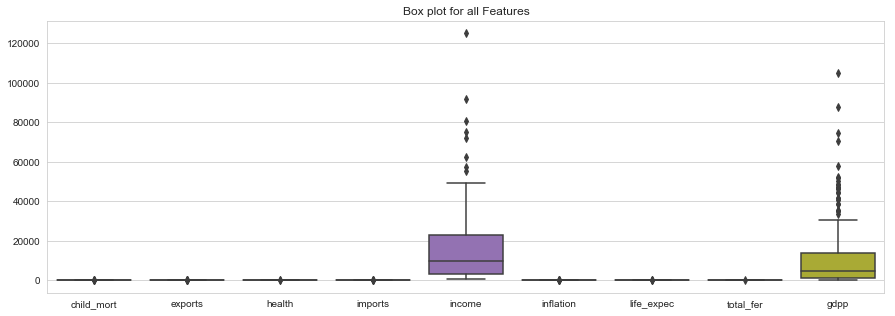

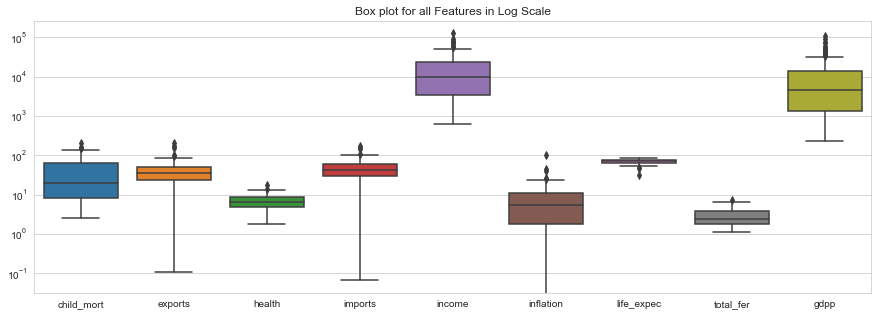

In [24]:
# Outlier check for each Features
# This will plot all the features and where we can check how far is the distribution
# Outlier is present for income and gdpp the scale is huge
fig = plt.figure(1,figsize = (15,5))
sns.boxplot(data=country_data_df)
plt.title('Box plot for all Features')

# so as to check the spread in terms of log scale
fig = plt.figure(2,figsize = (15,5))
sns.boxplot(data=country_data_df)
plt.yscale('log')
plt.title('Box plot for all Features in Log Scale')
plt.show()

# For Income as the scales are huge hence it has streched the graph, 
# but when we set the scale to log scale we can clearly see the difference

Number of Numerical Columns is 9


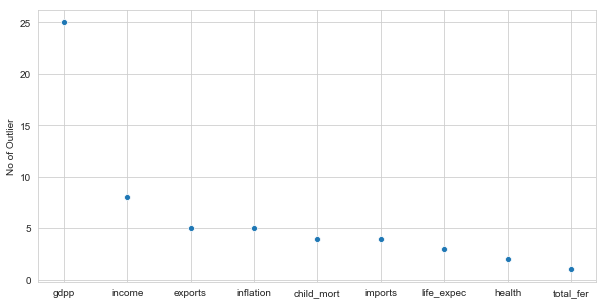

Number of Outliers Existing: 57


In [25]:
# Firstly we would fetch the numeric Data and then we will check eaxh of the Numeric Column whether they are Outliers or not
# So here we will see the Q1 and Q4, if the data points are < Q1-(1.5 * IQR) and > Q3+(1.5 * IQR) then the data point is treated as Outlier
# We will get the points and then we would plot and check it out the Number of Outliers per data point

df_numerical_col = country_data_df.select_dtypes(np.number).columns.tolist()
print("Number of Numerical Columns is {0}".format(len(df_numerical_col)))
country_data_numerical_cols = country_data_df[df_numerical_col]
Q1 = country_data_numerical_cols.quantile(0.25)
Q3 = country_data_numerical_cols.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((country_data_numerical_cols < (Q1 - 1.5 * IQR)) | (country_data_numerical_cols > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
plt.figure(figsize=(10,5))
sns.scatterplot(x = outlier_cnt_df.index, y = outlier_cnt_df['No of Outlier'] )
plt.show()

print("Number of Outliers Existing: {0}".format(outlier_cnt_df.sum().values[0]))

In [26]:
# Below are the top five columns which has outliers
outlier_cnt_df.head(5)

,No of Outlier
gdpp,25
income,8
exports,5
inflation,5
child_mort,4


**Conclusion driven** : 
As we infer for the above box plot as well gdpp has the highest number of outliers, in this case 25

And for rest of the Features the Number of Outliers is less than 10.
I will take a call to not remove outliers as there are very less data points and if I drop there won't be ample number of data to work on. So What I would be doing now is compute the PCA and after computing the PCA once the principal component is determined I will drop the putliers. Why because now the number of data points to be dropped is more than 40, but after the PCA, PC will less than the number of features so as a result the number of data points to be dropped will also be less

### Relationship among the Feature

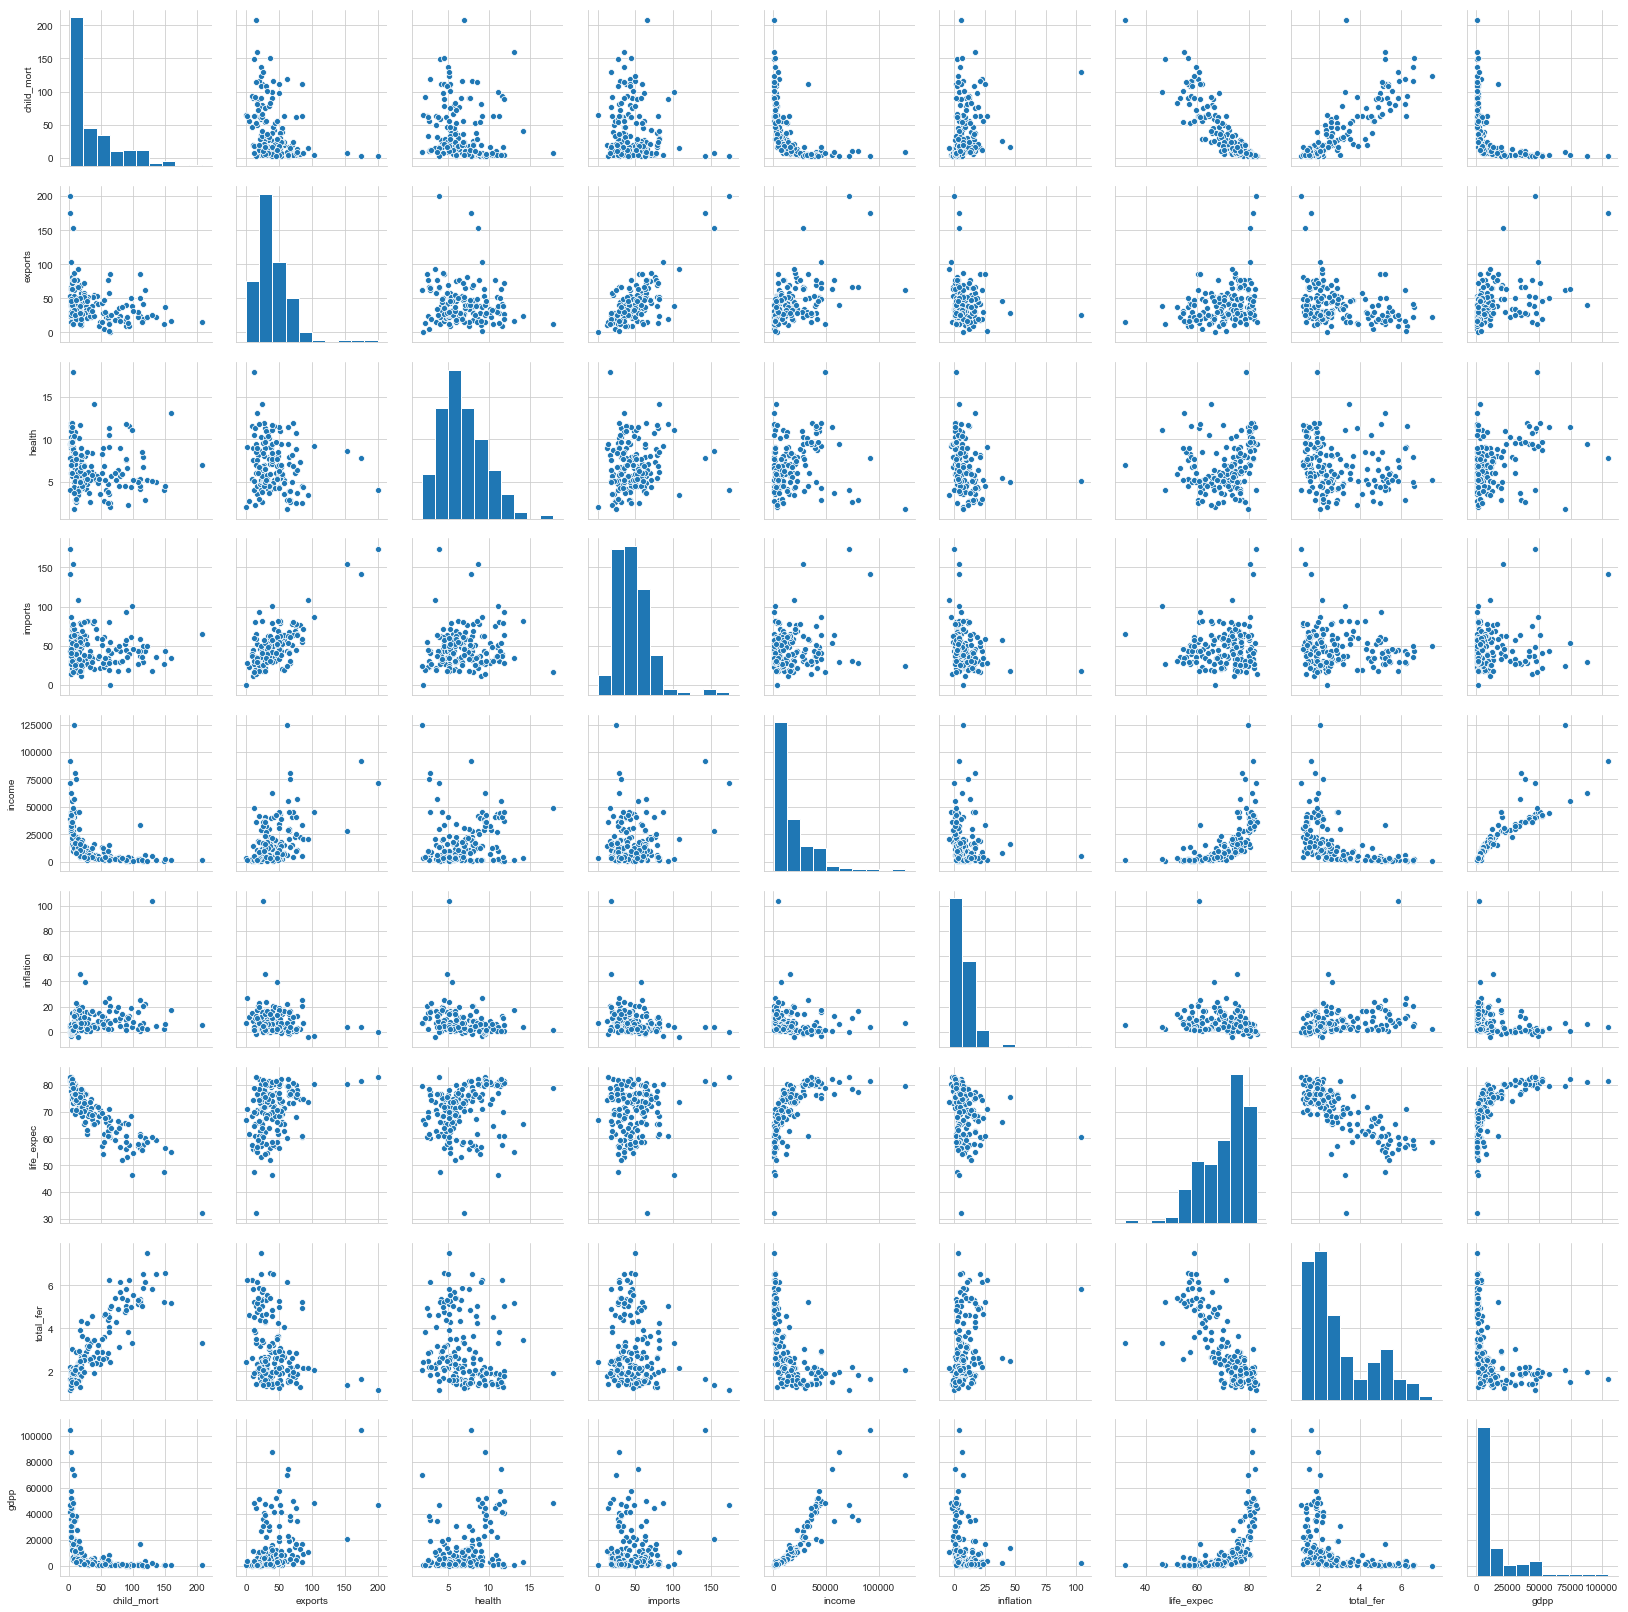

In [27]:
sns.pairplot(country_data_df)
plt.show()

**Conclusion Driven**: There are some data points as we can see from above there are Linear Relation, so we would try to see how does the correlation matrix looks like

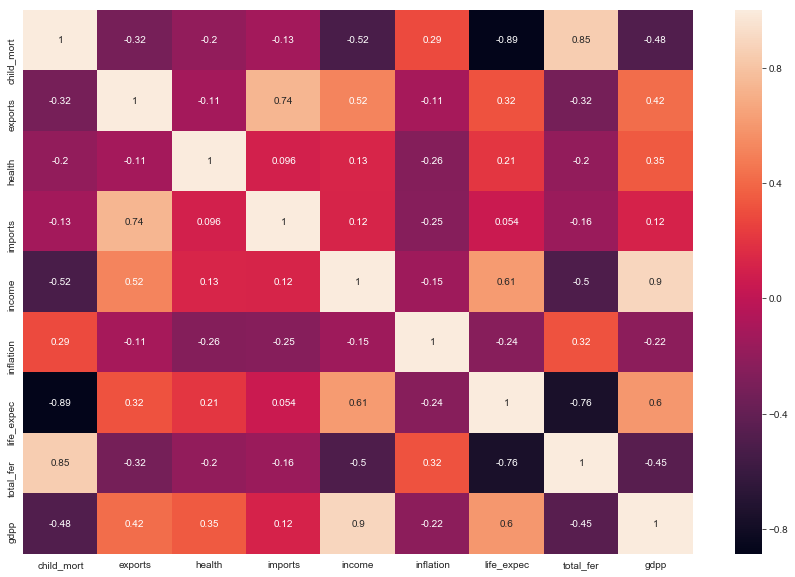

In [28]:
## Plotting the Correlation Matrix to see relationship among the features
plt.figure(figsize=(15,10))
sns.heatmap(country_data_df.corr(), annot= True)
plt.show()
# There are some features as we can see vekiw for which there are strong positive and negative correlation exists like 
# life_expec and child_mort and total_fer and child_mort, income and gdpp

# As there is a strong correlation we will implement PCA and we will try to remove them

### Applying PCA

In [29]:
country_data_work = country_data_df.copy() # Keeping a copy of the Dataset so that the original data is not messed up
country_data_work.pop('country') # Getting only the Country columns
country_data_work.head() # Getting the rest of the columns

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
# prior to applying the PCA we need to scale and center the data
# Hence we are applying the Standard Scallar
sc = StandardScaler()
country_data_scaled = sc.fit_transform(country_data_work)
country_data_scaled[:5] # Getting the scalled Data and the some data points

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

In [31]:
# Applying the PCA without specifying the number of components
# As we can see 
pca = PCA(random_state=42)
pca.fit(country_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# Lets also see the Covariance Matrice
pca.get_covariance()

array([[ 1.0060241 , -0.32000945, -0.2016093 , -0.12797725, -0.52747354,
         0.29001277, -0.89201752,  0.85358942, -0.485942  ],
       [-0.32000945,  1.0060241 , -0.11509761,  0.74182289,  0.51989676,
        -0.10794074,  0.3182181 , -0.32193832,  0.42124719],
       [-0.2016093 , -0.11509761,  1.0060241 ,  0.09629328,  0.1303592 ,
        -0.2569142 ,  0.21196135, -0.19785877,  0.34804965],
       [-0.12797725,  0.74182289,  0.09629328,  1.0060241 ,  0.12314364,
        -0.2484822 ,  0.05471819, -0.16000656,  0.11619394],
       [-0.52747354,  0.51989676,  0.1303592 ,  0.12314364,  1.0060241 ,
        -0.14864609,  0.61564899, -0.50486319,  0.90096644],
       [ 0.29001277, -0.10794074, -0.2569142 , -0.2484822 , -0.14864609,
         1.0060241 , -0.24114897,  0.31883023, -0.22296618],
       [-0.89201752,  0.3182181 ,  0.21196135,  0.05471819,  0.61564899,
        -0.24114897,  1.0060241 , -0.76545827,  0.60370413],
       [ 0.85358942, -0.32193832, -0.19785877, -0.16000656, -0

In [33]:
# Lets see what are the principal components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [34]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

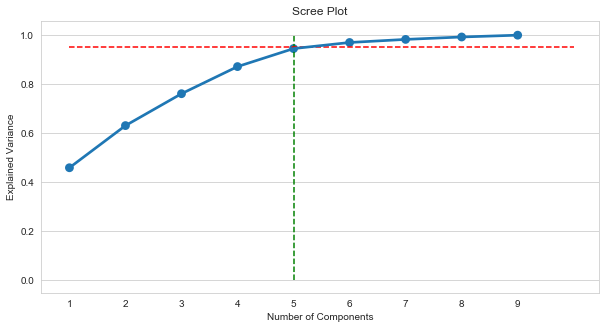

In [35]:
# Using the Scree plot we would try to find what would be the ideal number of components
var_cumvar = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
sns.pointplot(list(range(1,len(var_cumvar)+1)), var_cumvar)
plt.vlines(x=4, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="r", linestyles="--")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

**Conclusion Driven**:The ideal number of components is 5, as we consider 95% of variance is being explained by 5 PC
Lets use this five components

In [36]:
# Applying the PCA with the number of components as 5
# we will use the IncrementalPCA,as per the 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html
# It can be more memory efficient wrt to PCA

final_pca = IncrementalPCA(n_components=5 )
final_df_after_pca = final_pca.fit_transform(country_data_scaled)

In [37]:
print("Shape of the Dataframe Before PCA is {0}".format(country_data_scaled.shape))
print("Shape of the Dataframe after PCA is {0}".format(final_df_after_pca.shape))

Shape of the Dataframe Before PCA is (167, 9)
Shape of the Dataframe after PCA is (167, 5)


In [38]:
# This is the Final Data frame after applying the PCA using 5 components
final_df = pd.DataFrame(final_df_after_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
final_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


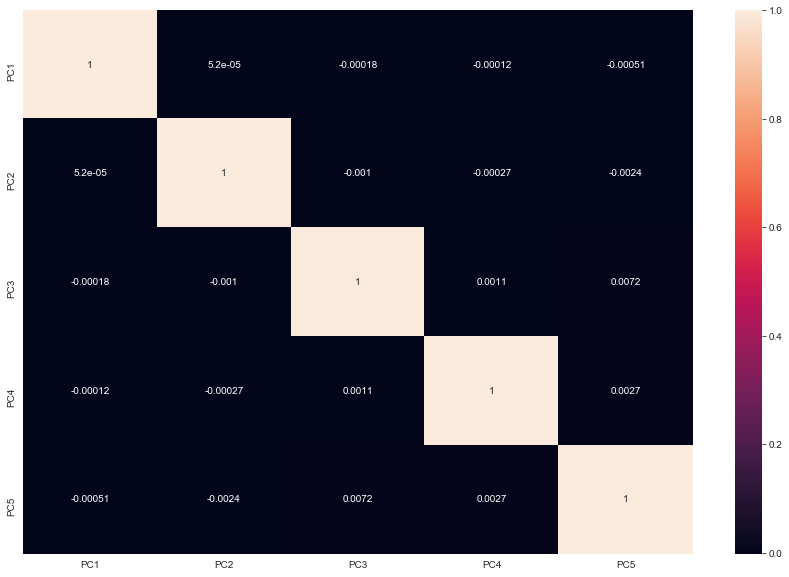

In [39]:
## Plotting the Correlation Matrix to see relationship among the features after PCA
plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr(), annot= True)
plt.show()

**Conclusion Driven**: All the Correlations are removed as we can see above
### Outlier Removal

Number of Numerical Columns is 5


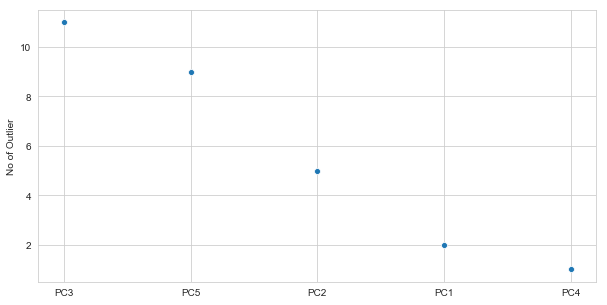

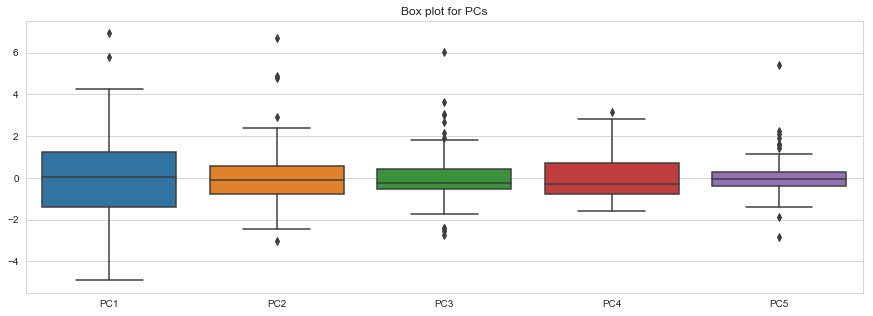

Number of Outliers Existing: 28


In [40]:
# Firstly we would fetch the numeric Data and then we will check eaxh of the Numeric Column whether they are Outliers or not
# So here we will see the Q1 and Q4, if the data points are < Q1-(1.5 * IQR) and > Q3+(1.5 * IQR) then the data point is treated as Outlier
# We will get the points and then we would plot and check it out the Number of Outliers per data point

df_numerical_col = final_df.select_dtypes(np.number).columns.tolist()
print("Number of Numerical Columns is {0}".format(len(df_numerical_col)))
country_data_numerical_cols = final_df[df_numerical_col]
Q1 = country_data_numerical_cols.quantile(0.25)
Q3 = country_data_numerical_cols.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((country_data_numerical_cols < (Q1 - 1.5 * IQR)) | (country_data_numerical_cols > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
plt.figure(figsize=(10,5))
sns.scatterplot(x = outlier_cnt_df.index, y = outlier_cnt_df['No of Outlier'] )

fig = plt.figure(2,figsize = (15,5))
sns.boxplot(data=final_df)
plt.title('Box plot for PCs')
plt.show()

print("Number of Outliers Existing: {0}".format(outlier_cnt_df.sum().values[0]))

**Conclusion Driven**: As it can be seen some of the PC have a large number of outliers, but it is less than as compared to Outlier analysis we did prior to applying PCA. So what we can do is remove all the data points which are considered as outliers

In [41]:
# To find the index of the 
set_list = []
country_data_numerical_cols = final_df[df_numerical_col]
Q1 = country_data_numerical_cols.quantile(0.25)
Q3 = country_data_numerical_cols.quantile(0.75)
IQR = Q3 - Q1
for col in IQR.index.tolist():
    set_list += (country_data_numerical_cols[(country_data_numerical_cols[col] < (Q1[col] - 1.5 * IQR[col])) | (country_data_numerical_cols[col] > ( Q3[col] + 1.5 * IQR[col]))][col].index.tolist())
index_to_drop = list(set(set_list))
#unique index to be dropped
print(index_to_drop)

[128, 98, 131, 163, 133, 101, 102, 103, 123, 81, 82, 113, 115, 149, 87, 23, 88, 91, 31, 159]


In [42]:
#Num of unique index to be dropped
len(index_to_drop)

20

In [43]:
# Delete those index which has outliers from Principal Component DF 
#as well as the original DF as later the Country name will be merged
print("Prior to dropping Shape is {0}".format(final_df.shape))
final_df.drop(index = list(index_to_drop), inplace=True)
country_data_df.drop(index = list(index_to_drop), inplace=True)
print("After dropping Shape is {0}".format(final_df.shape))

Prior to dropping Shape is (167, 5)
After dropping Shape is (147, 5)


In [44]:
# This is to reset the index, as some of the rows were dropped
final_df.reset_index(inplace = True)
final_df.drop('index', axis = 1, inplace = True)
country_data_df.reset_index(inplace = True)
country_data_df.drop('index', axis = 1, inplace = True)

### Clustering

In [45]:
# Now we would try to apply Hopkins test to check whether the data can be clustered together or not
# Hopkins test basically gives a value which gives a cluster tendency 
# If the value is between {0.01, ...,0.3}, the data is regularly spaced, value is around 0.5, it is random,
# value is between {0.7, ..., 0.99}, it has a high tendency to cluster.
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

print("Hopkins Statistic Score is {0}".format(round(hopkins(final_df),2)))

Hopkins Statistic Score is 0.72


**Conclusion Driven**: From the Hopkins Statistic We get the score > 0.60, which means the data has a high cluster Tendency.
So now we will proceed with the Clustering. So reject out Null Hypothesis, that the data point is uniformly distributed.

#### Kmeans 
First we need to determine how many clusters are required

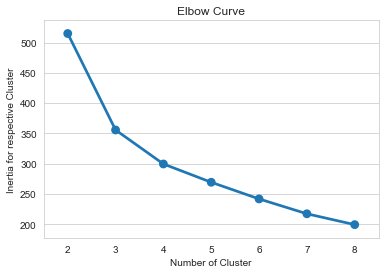

In [46]:
# First from Elbow curve, we will determine the number of cluster required for Clustering
ssd = []
cluster_list = list(range(2,9))
for num_of_cluster in cluster_list:
    kmeans = KMeans(n_clusters=num_of_cluster, max_iter=50, random_state=42).fit(final_df)
    ssd.append(kmeans.inertia_)
sns.pointplot(cluster_list, ssd)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia for respective Cluster')
plt.title('Elbow Curve')
plt.show()

**Conclusion Driven**: The cluster we can choose as **3**, as after that inertia start decreasing in Linear fashion

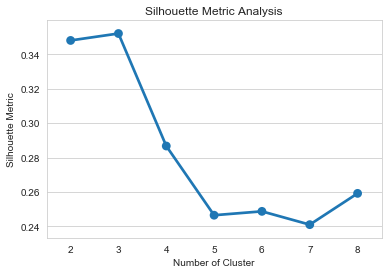

In [47]:
# Silhouette Score so as to determine the Number of Cluster. This will give the number of Cluster to consider for Clustering
silhoute_score_list = []
cluster_list = list(range(2,9))
for num_of_cluster in cluster_list:
    kmeans = KMeans(n_clusters=num_of_cluster, max_iter=50, random_state=42).fit(final_df)
    silhoute_score_list.append(silhouette_score(final_df, kmeans.labels_))
sns.pointplot(cluster_list, silhoute_score_list)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Metric')
plt.title('Silhouette Metric Analysis')
plt.show()

**Conclusion Driven**: As we can see for Cluster **3**, it has the highest value and as we know the value more closer to 1, the data point is very much similar to other data point in cluster. So by using the Elbow curve and Silhouette metric we consider the cluster point as 3

In [48]:
# Lets do the Kmeans clustering using the cluster as 3
# we would conside max iteration as 50, as we would take the initialization as Kmeans ++, 
# so that the centroid will be instantiated using Algorithm not randomly
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50, random_state=42).fit(final_df)

In [49]:
# So this is the Final DF formed using the Kmeans Algorithm
kmeans_res_df = final_df.copy()
kmeans_res_df['cluster_id'] = kmeans.labels_
kmeans_res_df = pd.concat([country_data_df['country'],kmeans_res_df], axis = 1) 
kmeans_res_df.head()

,country,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0


#### Hierarchial Clustering
First we would try with Single Linkage

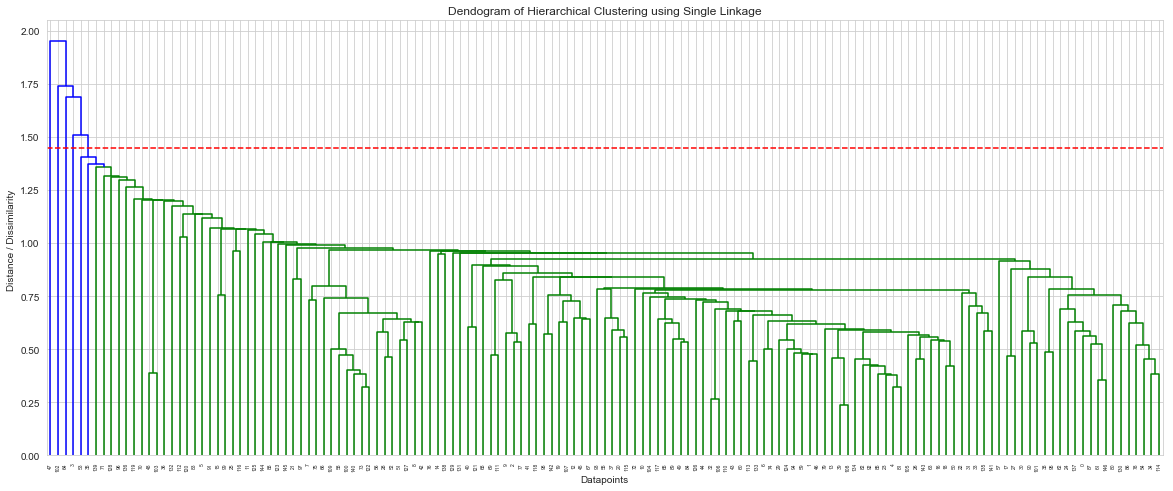

In [50]:
# So we are trying to the build the dendogram using the Single Linkage
plt.figure(figsize=(20,8))
merging = linkage(final_df, method= 'single', metric='euclidean')
dendrogram(merging)
plt.hlines(y=1.45, xmax = 2000, xmin=0, colors="r", linestyles="--")
plt.xlabel('Datapoints')
plt.ylabel('Distance / Dissimilarity ')
plt.title('Dendogram of Hierarchical Clustering using Single Linkage')
plt.show()

**Conclusion Driven**:For the Single Linkage some inference can be drawn
1. There are mainly two clusters as per the color in the Dendogram
2. We can think of placing the cut off at 1.45, so that we can have cluster as 5

As we can see that there is a horizontal line linking the cluster that get merged, established at the height they are merged.It looks quite crowded at the bottom right, because relatively many data points are close, as there are lots of horizontal branches at the same height

In [51]:
# Forming up the final Data Frame, but taking the number of Cluster as 5 for the cluster we have defined for Single Linkage
sing_link_hier_df = pd.concat([final_df, pd.Series(cut_tree(merging,n_clusters=5).reshape(-1))], axis = 1)
sing_link_hier_df.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','cluster_id']
sing_link_hier_df = pd.concat([country_data_df['country'],sing_link_hier_df], axis = 1) 
sing_link_hier_df.head()

,country,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0


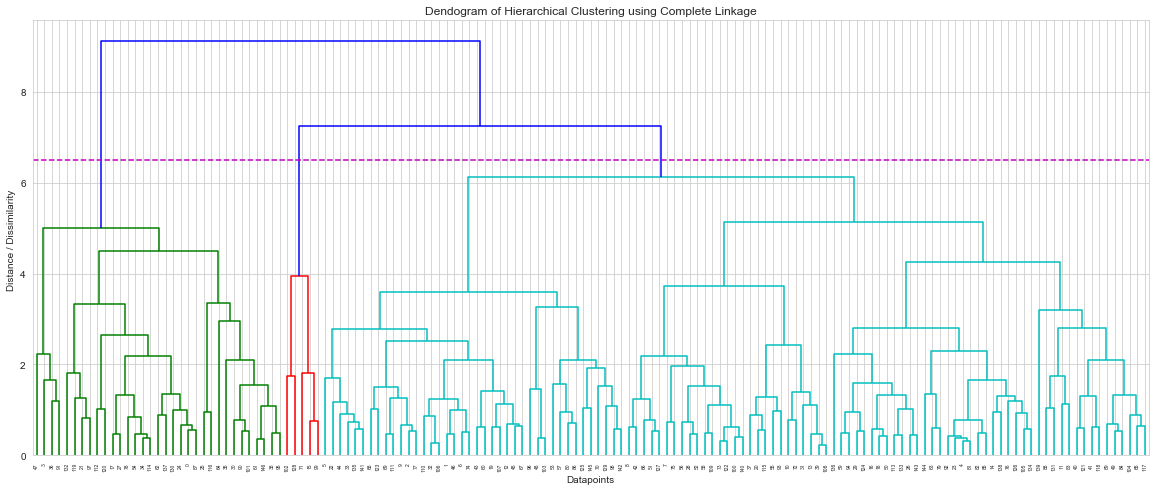

In [52]:
# Using Complete Linkage 
plt.figure(figsize=(20,8))
merging = linkage(final_df, method= 'complete', metric='euclidean')
dendrogram(merging)
plt.hlines(y= 6.5, xmax = 2000, xmin=0, colors="m", linestyles="--")
plt.xlabel('Datapoints')
plt.ylabel('Distance / Dissimilarity ')
plt.title('Dendogram of Hierarchical Clustering using Complete Linkage')
plt.show()

**Conclusion Driven**: For the Complete Linkage
1. We can have the cutoff at 6.5, which leads to number of cluster as 3
2. There are many distinct cluster as per the dendogram and not like single cluster where the cluster were not separable distinctly.

In [53]:
# Forming up the final Data Frame, but taking the number of Cluster as 3 for the cluster we have defined for Complete Linkage
comp_link_hier_df = pd.concat([final_df, pd.Series(cut_tree(merging,n_clusters=3).reshape(-1))], axis = 1)
comp_link_hier_df.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','cluster_id']
comp_link_hier_df = pd.concat([country_data_df['country'],comp_link_hier_df], axis = 1) 
comp_link_hier_df.head()

,country,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


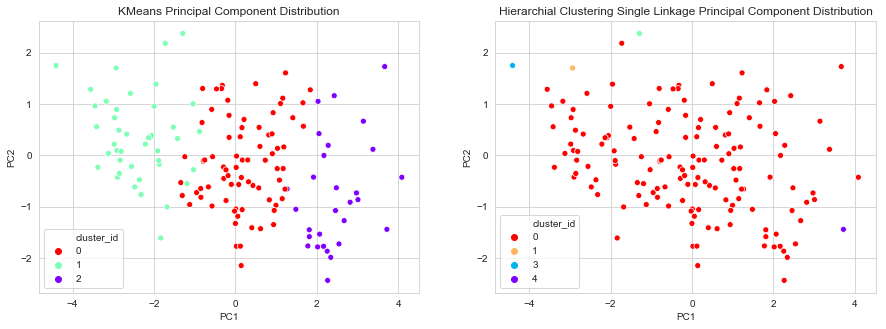

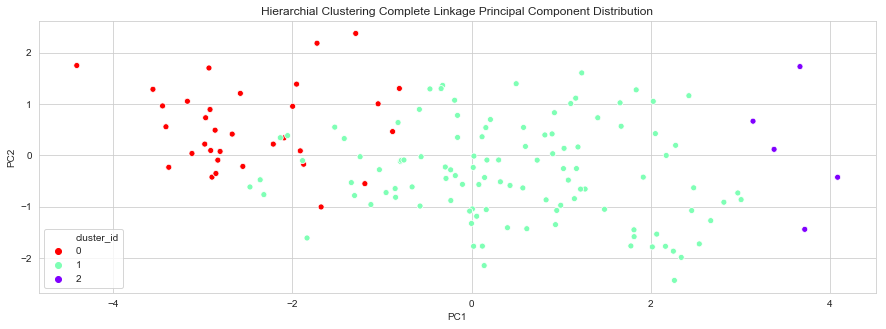

In [54]:
# Visualization of the Principal Component PC1 and PC2 wrt to Cluster ID
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(kmeans_res_df['PC1'], kmeans_res_df['PC2'], hue= kmeans_res_df['cluster_id'], palette="rainbow_r")
plt.title('KMeans Principal Component Distribution')
plt.subplot(1,2,2)
sns.scatterplot(sing_link_hier_df['PC1'], sing_link_hier_df['PC2'], hue= sing_link_hier_df['cluster_id'], palette="rainbow_r",)
plt.title('Hierarchial Clustering Single Linkage Principal Component Distribution')

plt.figure(figsize=(15,5))
sns.scatterplot(comp_link_hier_df['PC1'], comp_link_hier_df['PC2'], hue= comp_link_hier_df['cluster_id'], palette="rainbow_r")
plt.title('Hierarchial Clustering Complete Linkage Principal Component Distribution')
plt.show()

**Conclusion Driven**:
1. For the **KMeans** clustering result we can see that the number of cluster is 3 and they are almost distinguishible and separated
2. For the **Single Linkage Hierarchial Clustering** most of the data points are clubbed under one cluster, and we can see the cluster 1,2,3,4, they have identified each cluster as one data point
3. Now for the **Complete Linkage Hierarchical Clustering**, cluster 1 has covered the center part , and here also we can see all the clusters are distinguished  separately 

So I am taking the decision of going with **KMeans & Complete Hierarchical** Clustering because of the Cluster is more disguisible and correctly identified

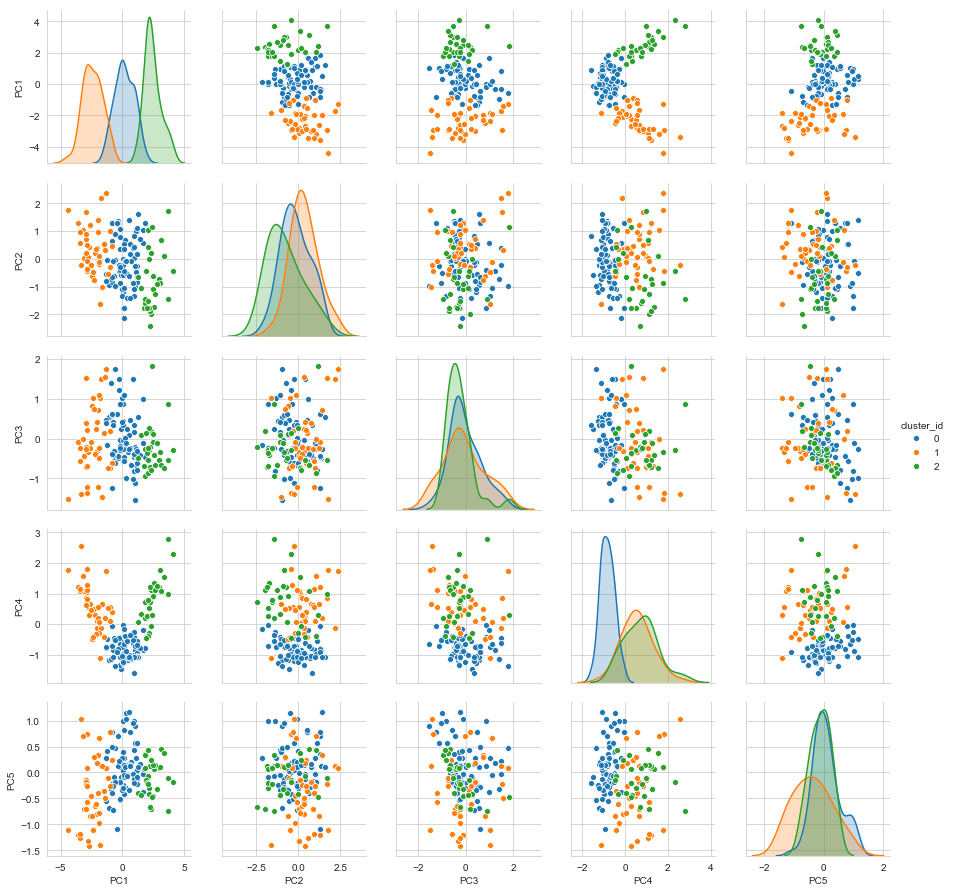

In [55]:
# to check how the plot loooks like per Principal Component and distinguish them based on cluster 
sns.pairplot(kmeans_res_df.iloc[:,1:], hue =  'cluster_id', vars = ['PC1','PC2','PC3','PC4','PC5'] )
plt.show()

In [56]:
# Merging the Dataframe with the Original DF for Kmeans
kmeans_res_final_df = country_data_df.merge(kmeans_res_df[['country','cluster_id']], on = 'country')
kmeans_res_final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [57]:
# Forming the aggregate Function
agg_func = { 'child_mort': 'mean', 
             'exports': 'mean', 
             'health': 'mean',
             'imports': 'mean', 
             'income': 'mean', 
             'inflation': 'mean', 
             'life_expec': 'mean', 
             'total_fer': 'mean', 
             'gdpp': 'mean' }

# To check the statistical distribution of the Features per cluster wise
# For the KMeans Clustering
round(kmeans_res_final_df.groupby('cluster_id').agg(agg_func),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,21.45,40.37,6.17,47.09,11915.66,6.72,73.03,2.29,6138.61
1,91.44,29.98,5.95,39.14,4197.98,10.20,59.56,4.96,1951.83
2,4.66,46.32,9.46,44.09,38058.62,1.55,80.16,1.75,40410.34


**Conclusion Driven**:
We can see there are mainly three clusters, 
1. For cluster 2: It's more of a Developed Countries, where child_mort,inflation,total_fert  is less, exports, healthimports, income, life_expec and gdpp is more
2. For cluster 0: it's more like a developing country where child_mort, income, life_expec and gdpp is less compared to developed countries,
3. For cluster 1: They are more like a under developed countries that needs attention, child_mort is quite high, income is also very low, gdpp & life_expec is also very low

**Conclusion Driven**:
1. For Child Mortality: For Cluster 0 and 2 then it targets the lower values are they are very similar, and for 

In [58]:
# Merging the Dataframe with the Original DF for Kmeans
comp_link_hier_final_df = country_data_df.merge(comp_link_hier_df[['country','cluster_id']], on = 'country')
comp_link_hier_final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [59]:
# To check the statistical distribution of the Features per cluster wise
# For the hierarchical clustering
round(comp_link_hier_final_df.groupby('cluster_id').agg(agg_func),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,97.19,31.92,6.51,43.63,3766.52,8.93,58.14,5.20,1874.36
1,21.81,39.10,6.66,43.63,16616.61,6.27,73.89,2.31,12410.61
2,4.18,71.02,10.55,61.32,50020.00,1.16,80.86,1.83,61160.00


**Conclusion Driven**:
For Hierarchical Clustering
1. For cluster 2, it looks more like a developed country, child_mort is very less, income, exports, health, imports,  gdpp is huge
2. For cluster 1, it looks more like a Developing country, child mort is less than developed country cluster,
3. For Cluster 0, child_mort is highest of all, exports, health, income, life_expec gdpp is lowest of all cluster, so this seems to be representing the Under developed country

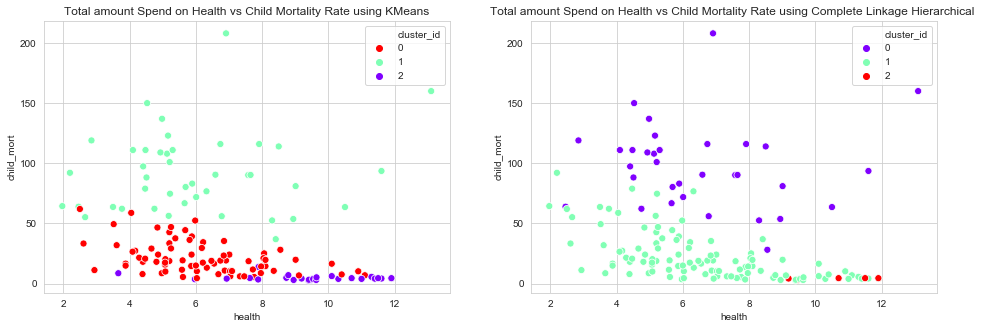

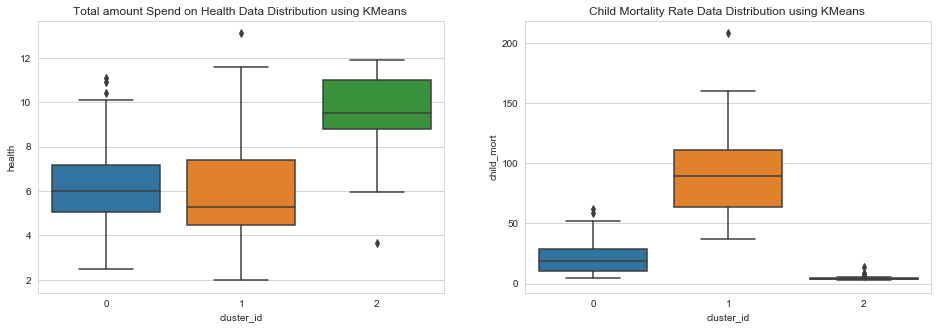

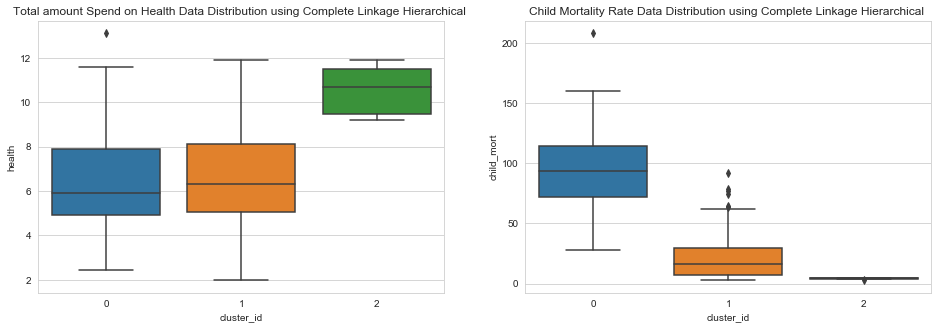

25th Percntile Value for Total Spending on Health 5.07
75th Percntile Value for Child Mortality 60.4


In [60]:
# Lets see the distribution of Health vs Child Mortality
plt.figure(1,figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(kmeans_res_final_df['health'], kmeans_res_final_df['child_mort'], hue = kmeans_res_final_df['cluster_id'],palette="rainbow_r",s = 50)
plt.title('Total amount Spend on Health vs Child Mortality Rate using KMeans')

plt.subplot(1,2,2)
sns.scatterplot(comp_link_hier_final_df['health'], comp_link_hier_final_df['child_mort'], hue = comp_link_hier_final_df['cluster_id'], palette="rainbow", s = 50)
plt.title('Total amount Spend on Health vs Child Mortality Rate using Complete Linkage Hierarchical ')
plt.show()

plt.figure(2,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = kmeans_res_final_df['health'], x = kmeans_res_final_df['cluster_id'])
plt.title('Total amount Spend on Health Data Distribution using KMeans ')

plt.subplot(1,2,2)
sns.boxplot(y = kmeans_res_final_df['child_mort'], x = kmeans_res_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using KMeans ')
plt.show()

plt.figure(3,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = comp_link_hier_final_df['health'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Total amount Spend on Health Data Distribution using Complete Linkage Hierarchical ')

plt.subplot(1,2,2)
sns.boxplot(y = comp_link_hier_final_df['child_mort'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using Complete Linkage Hierarchical ')
plt.show()

print("25th Percntile Value for Total Spending on Health {0}".format(kmeans_res_final_df['health'].quantile([0.25]).values[0]))
print("75th Percntile Value for Child Mortality {0}".format(kmeans_res_final_df['child_mort'].quantile([0.75]).values[0]))

**Conclusion Driven**:
1. For KMeans cluster plot, we can see that Cluster 1 righly identifies the value which are having low Health Spending and high child mortality
2. For Hierarchical Clustering, cluster 0 identifies the low Health Spending and high child mortality
3. From the Box plot of KMeans
    1. For Health, Cluster 1 is capturing all the countries which has lower spending towards health as the lower whisker and also the median is loweset and for Child Mortality rate, cluster 1 is capturing the highest child mortality rate
4. From the Box plot of Hirarchial Clustering
    1. Cluster 0  is capturing the low spendig on Health, but for Child Mortality rate, Cluster 0 is capturing the high Child mortality rate 

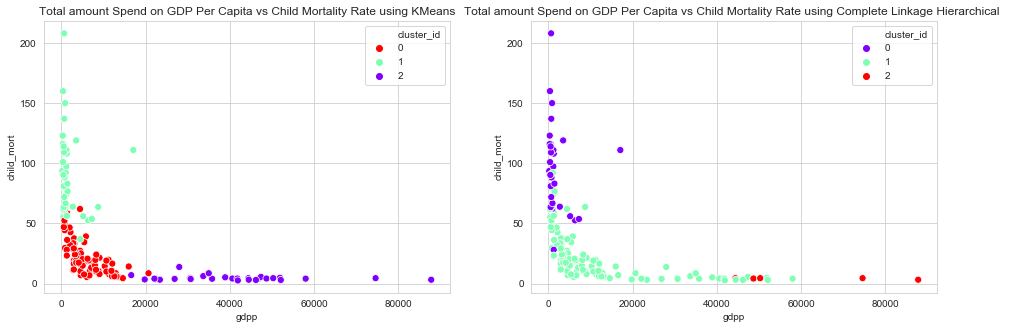

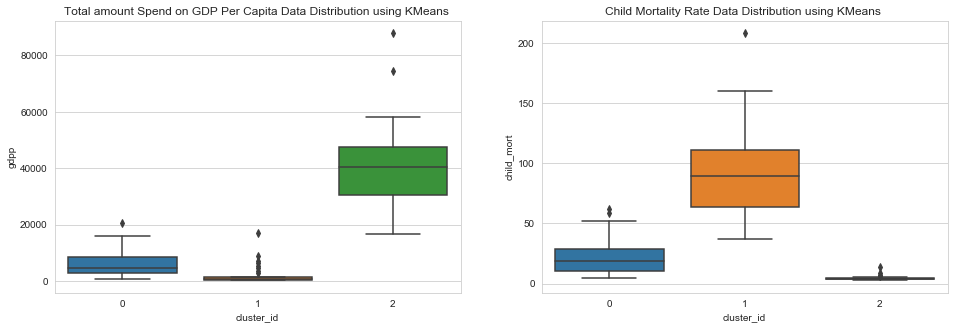

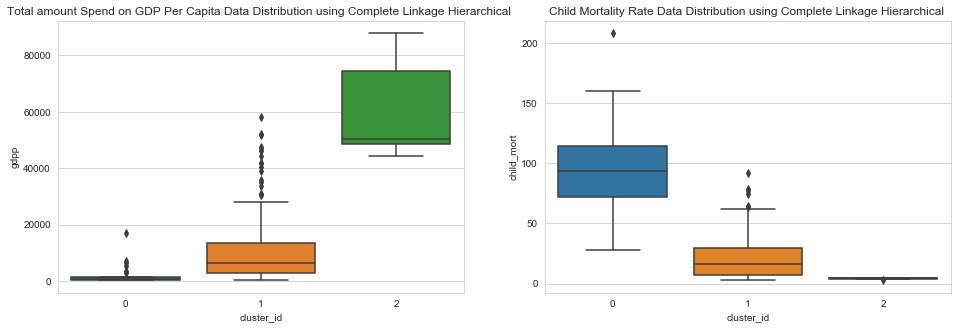

25th Percntile Value for GDP Per Capita 1310.0
75th Percntile Value for Child Mortality 60.4


In [61]:
# Lets see the distribution of GDP Per Capita vs Child Mortality
plt.figure(1,figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(kmeans_res_final_df['gdpp'], kmeans_res_final_df['child_mort'], hue = kmeans_res_final_df['cluster_id'],palette="rainbow_r",s = 50)
plt.title('Total amount Spend on GDP Per Capita vs Child Mortality Rate using KMeans')

plt.subplot(1,2,2)
sns.scatterplot(comp_link_hier_final_df['gdpp'], comp_link_hier_final_df['child_mort'], hue = comp_link_hier_final_df['cluster_id'], palette="rainbow", s = 50)
plt.title('Total amount Spend on GDP Per Capita vs Child Mortality Rate using Complete Linkage Hierarchical ')
plt.show()

plt.figure(2,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = kmeans_res_final_df['gdpp'], x = kmeans_res_final_df['cluster_id'])
plt.title('Total amount Spend on GDP Per Capita Data Distribution using KMeans ')

plt.subplot(1,2,2)
sns.boxplot(y = kmeans_res_final_df['child_mort'], x = kmeans_res_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using KMeans ')
plt.show()

plt.figure(3,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = comp_link_hier_final_df['gdpp'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Total amount Spend on GDP Per Capita Data Distribution using Complete Linkage Hierarchical ')

plt.subplot(1,2,2)
sns.boxplot(y = comp_link_hier_final_df['child_mort'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using Complete Linkage Hierarchical ')
plt.show()

print("25th Percntile Value for GDP Per Capita {0}".format(kmeans_res_final_df['gdpp'].quantile([0.25]).values[0]))
print("75th Percntile Value for Child Mortality {0}".format(kmeans_res_final_df['child_mort'].quantile([0.75]).values[0]))

**Conclusion Driven**:
1. For the KMeans Clustering , cluster 1 correctly identifies the where there is low GDP and High Child Child Mortality
2. For the Complete Linkage Hierarchical Clustering , cluster 0 correctly identifies where there is low GDP and High Child Child Mortality
3. From the Box plot of KMeans
    1. For GDPP, cluster 1 capturing all the lower values, and as above plot, for spending on health Cluster 1 is capturing the highest spending on health
4. From the Box plot of Hirarchial Clustering
    1. Cluster 0 is capturing the low spendig on GDPP, but for child mortality cluster 0  is capturing the highest value

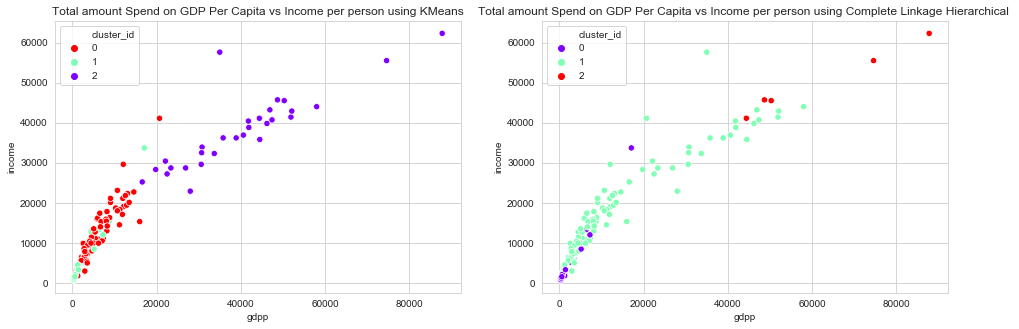

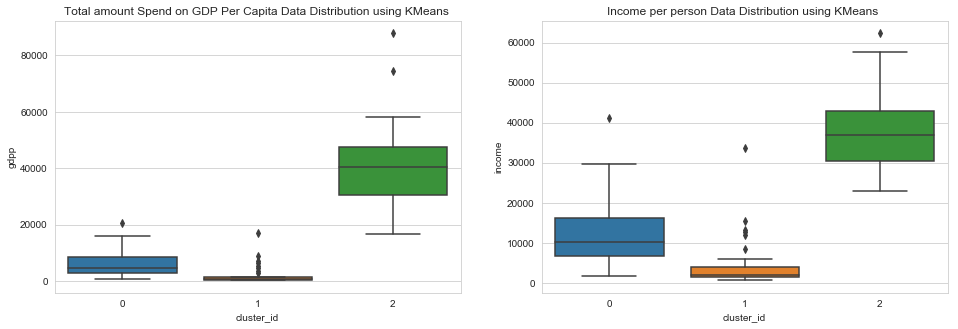

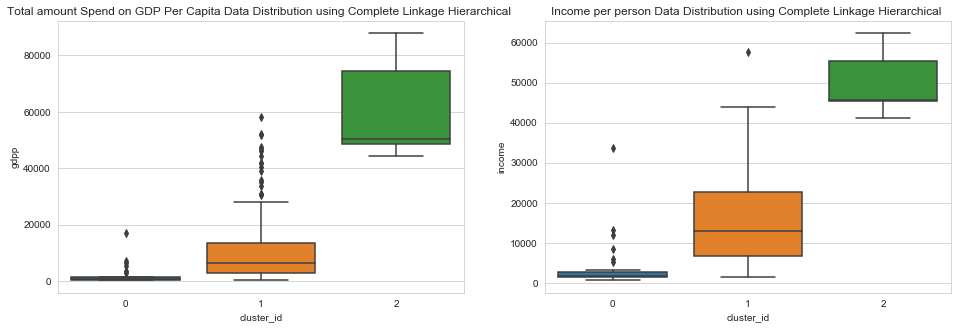

25th Percntile Value for GDP Per Capita 1310.0
25th Percntile Value for Income per person 3545.0


In [62]:
# Lets see the distribution of GDP Per Capita vs Net Income per person
plt.figure(1,figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(kmeans_res_final_df['gdpp'], kmeans_res_final_df['income'], hue = kmeans_res_final_df['cluster_id'],palette="rainbow_r",s = 40)
plt.title('Total amount Spend on GDP Per Capita vs Income per person using KMeans')

plt.subplot(1,2,2)
sns.scatterplot(comp_link_hier_final_df['gdpp'], comp_link_hier_final_df['income'], hue = comp_link_hier_final_df['cluster_id'], palette="rainbow", s = 40)
plt.title('Total amount Spend on GDP Per Capita vs Income per person using Complete Linkage Hierarchical ')
plt.show()

plt.figure(2,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = kmeans_res_final_df['gdpp'], x = kmeans_res_final_df['cluster_id'])
plt.title('Total amount Spend on GDP Per Capita Data Distribution using KMeans ')

plt.subplot(1,2,2)
sns.boxplot(y = kmeans_res_final_df['income'], x = kmeans_res_final_df['cluster_id'])
plt.title('Income per person Data Distribution using KMeans ')
plt.show()

plt.figure(3,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = comp_link_hier_final_df['gdpp'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Total amount Spend on GDP Per Capita Data Distribution using Complete Linkage Hierarchical ')

plt.subplot(1,2,2)
sns.boxplot(y = comp_link_hier_final_df['income'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Income per person Data Distribution using Complete Linkage Hierarchical ')
plt.show()

print("25th Percntile Value for GDP Per Capita {0}".format(kmeans_res_final_df['gdpp'].quantile([0.25]).values[0]))
print("25th Percntile Value for Income per person {0}".format(kmeans_res_final_df['income'].quantile([0.25]).values[0]))

**Conclusion Driven**:
For the low income than 25th percentile and low GDP than 25th percentile. Cluster 1 identifies properly for KMeans and for Hierarchical Clustering the Cluster 0 identifies properly
1. From the Box plot of KMeans
    1. For GDPP, cluster 1 capturing all the lower values, and cluster 1 is capturing the information specific for the persons having lowest income
2. From the Box plot of Hirarchial Clustering
    1. For GDPP cluster 0 is capturing the lowest spending on gdpp and Cluster 0 is also capturing the lowest income

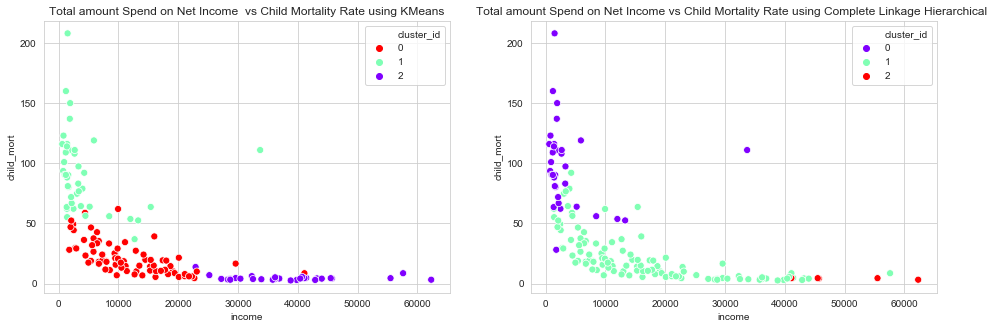

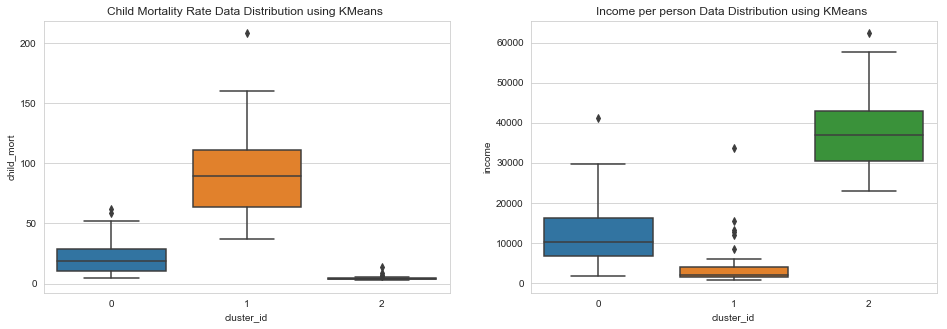

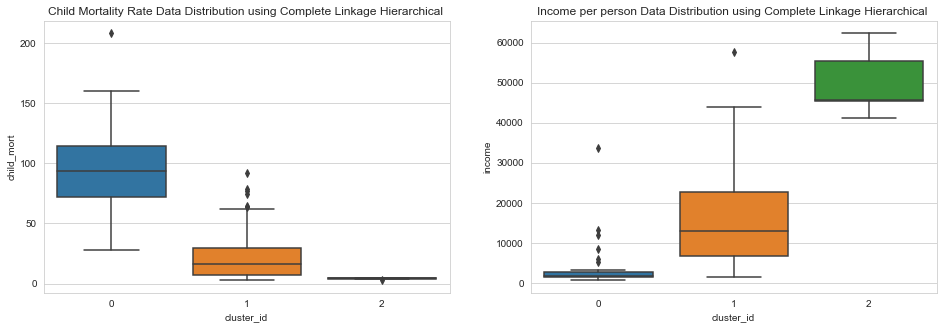

25th Percntile Value for Net Income per person 3545.0
75th Percntile Value for Child Mortality 60.4


In [63]:
# Lets see the distribution of Net Income per person vs Child Mortality
plt.figure(1,figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(kmeans_res_final_df['income'], kmeans_res_final_df['child_mort'], hue = kmeans_res_final_df['cluster_id'],palette="rainbow_r",s = 50)
plt.title('Total amount Spend on Net Income  vs Child Mortality Rate using KMeans')

plt.subplot(1,2,2)
sns.scatterplot(comp_link_hier_final_df['income'], comp_link_hier_final_df['child_mort'], hue = comp_link_hier_final_df['cluster_id'], palette="rainbow", s = 50)
plt.title('Total amount Spend on Net Income vs Child Mortality Rate using Complete Linkage Hierarchical ')
plt.show()

plt.figure(2,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = kmeans_res_final_df['child_mort'], x = kmeans_res_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using KMeans ')

plt.subplot(1,2,2)
sns.boxplot(y = kmeans_res_final_df['income'], x = kmeans_res_final_df['cluster_id'])
plt.title('Income per person Data Distribution using KMeans ')
plt.show()

plt.figure(3,figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(y = comp_link_hier_final_df['child_mort'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Child Mortality Rate Data Distribution using Complete Linkage Hierarchical ')

plt.subplot(1,2,2)
sns.boxplot(y = comp_link_hier_final_df['income'], x = comp_link_hier_final_df['cluster_id'])
plt.title('Income per person Data Distribution using Complete Linkage Hierarchical ')
plt.show()

print("25th Percntile Value for Net Income per person {0}".format(kmeans_res_final_df['income'].quantile([0.25]).values[0]))
print("75th Percntile Value for Child Mortality {0}".format(kmeans_res_final_df['child_mort'].quantile([0.75]).values[0]))

**Conclusion Driven**:As we can see for the data less than 25th percentile of Net Income and more than 75th Percentile Child Mortality Rate is identified by Cluster 1 in KMeans and Cluster 0 for Hierarchical Cluster using Complete Linkage
For the Box plot we have already concluded above

So the Final Conclusion is From KMeans Cluster 1 provided information, that will help us in getting the country list who needs most number of attention and from Hirarchical clustering the Cluster 0 are capturing the lowest information. 
So now we would try to derive the list of countries who needs most amount of attention

And as we can see as most of the results for KMeans is almost same like Hierarchial clustering. So taking a decision here to go with **KMeans**

In [64]:
# So now we have identified the features using which we can come to clusion which country requires the most attention.
# So as to capture the Country list we have to focus on cluster 1 of Kmeans Resul
# health #child_mort #gdpp #income
# For health, we have to capture the lowest spend
# For child_mort, we have to capture the highest value of child mortality
# For gdpp, we have to capture the lowest GDP per capita
# For income, we have to capture the lowest income

# So the logic I have used is to get the respective features top 10 country and then checking the number of count of the countries
# And from them we will take the Country
# I am considering Cluster ID and also the Average why average because for all these feature we have very few outliers so 
# we can consider that. But for better result we can also fix some quantiles values like less than 20 Quantiles and we can proceed
# with that as well
country_name = dict()

def dict_country_creation(country_list):
    for country in country_list:
        if country in country_name.keys():
            country_name[country] += 1
        else:
            country_name[country] = 1

# Get the top 10 Countres for which the spending on health is less for the cluster 1
mean = kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) ][['country','health']].mean().values.tolist()[0]
country_list = (kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) & ( kmeans_res_final_df['health'] < mean ) ][['country','health']].sort_values(by = 'health'))['country'].values.tolist()
dict_country_creation(country_list)

# Get the top 10 Countres for which the spending on GDP per capita is less for the cluster 1
# going with Quantile as this field has outliers
quant = kmeans_res_final_df['gdpp'].quantile(0.10)
country_list = (kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) & ( kmeans_res_final_df['gdpp'] < quant )][['country','gdpp']].sort_values(by = 'gdpp'))['country'].values.tolist()
dict_country_creation(country_list)

# Get the top 10 Countres for which the income is less for the cluster 1
# going with Quantile as this field has outliers
quant = kmeans_res_final_df['income'].quantile(0.10) 
country_list = (kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) & ( kmeans_res_final_df['income'] < quant )][['country','income']].sort_values(by = 'income'))['country'].values.tolist()
dict_country_creation(country_list)

# Get the top 10 Countres for which the child mortality rate is high for the cluster 1
mean = kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) ][['country','child_mort']].mean().values.tolist()[0]
country_list = (kmeans_res_final_df[( kmeans_res_final_df['cluster_id'] == 1 ) & ( kmeans_res_final_df['child_mort'] > mean )][['country','child_mort']].sort_values(by = 'child_mort', ascending = False))['country'].values.tolist()
dict_country_creation(country_list)

print("Final Dict which holds the country that needs most of the attention")
final_list = sorted(country_name.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
final_list

Final Dict which holds the country that needs most of the attention


[('Niger', 4),
 ('Mozambique', 4),
 ('Sierra Leone', 3),
 ('Madagascar', 3),
 ('Guinea-Bissau', 3),
 ('Guinea', 3),
 ('Eritrea', 3),
 ('Congo, Dem. Rep.', 3),
 ('Burundi', 3),
 ('Burkina Faso', 3),
 ('Togo', 2),
 ('Rwanda', 2),
 ('Pakistan', 2),
 ('Mauritania', 2),
 ('Mali', 2),
 ('Malawi', 2),
 ('Haiti', 2),
 ('Gambia', 2),
 ('Equatorial Guinea', 2),
 ("Cote d'Ivoire", 2),
 ('Comoros', 2),
 ('Chad', 2),
 ('Cameroon', 2),
 ('Benin', 2),
 ('Angola', 2),
 ('Zambia', 1),
 ('Yemen', 1),
 ('Senegal', 1),
 ('Myanmar', 1),
 ('Lao', 1),
 ('Kenya', 1),
 ('Ghana', 1),
 ('Gabon', 1),
 ('Congo, Rep.', 1),
 ('Afghanistan', 1)]

In [65]:
# This is the final list of countries where there is a lot of focus is required
# why we are selecting the top 10 because for all them the count is 4, so we are selecting them
top_country_list = [ val[0] for val in sorted(country_name.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)[:10]]
top_country_list

['Niger',
 'Mozambique',
 'Sierra Leone',
 'Madagascar',
 'Guinea-Bissau',
 'Guinea',
 'Eritrea',
 'Congo, Dem. Rep.',
 'Burundi',
 'Burkina Faso']

In [66]:
# Final Data with respective fields
final_country_df = country_data_df[country_data_df['country'].isin(top_country_list)]
final_country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
24,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
35,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482
61,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
62,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547
86,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
95,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
101,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
116,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


**Conclusion**:
So these are the top 10 countries which requires most amount of attention
**'Burkina Faso', 'Burundi', 'Congo, Dem. Rep.', 'Eritrea', 'Guinea', 'Guinea-Bissau', 'Madagascar', 'Mozambique', 'Niger', 'Sierra Leone'**